<a href="https://colab.research.google.com/github/Mostofa-Najmus-Sakib/Social-Media-Mining/blob/main/Assisgnment2/SMM_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Properties of Real-world Networks and Centrality 

Loading all the library

In [ ]:
import networkx as nx
import pandas as pd
import io
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np 
from collections import OrderedDict
import os

*Change of directory*

In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cd /content/drive/My\ Drive/Colab\ Notebooks/

In [ ]:
cd /content/drive/My\ Drive/submissions/Mostofa\ Najmus\ Sakib/HW2/

/content/drive/.shortcut-targets-by-id/1vWHfsxivGp8L_gSKNIOdbRvkrLICTeHJ/submissions/Mostofa Najmus Sakib/HW2


## Question 1: Load the ​ 115th House retweets.gexf ​ network as an ​ undirected graph​  G

In [ ]:
G = nx.read_gexf("115th House retweets.gexf")

# **Calculation of largest connected component G0**

In [ ]:
G2 = G.to_undirected()
nx.is_directed(G2)

False

In [ ]:
G2.degree

DegreeView({'25086658': 2, '2970279814': 81, '1068499286': 72, '252819323': 22, '36686040': 53, '168673083': 5, '26051676': 9, '581141508': 84, '240363117': 4, '48117116': 8, '993153006': 34, '742735530287304704': 21, '76452765': 12, '140519774': 120, '24195214': 130, '24913074': 63, '818460870573441028': 25, '1089859058': 58, '242873057': 17, '50452197': 60, '818713465653051392': 69, '1140648348': 61, '851621377': 10, '1305596696': 7, '1531521632': 96, '164369297': 115, '19929362': 10, '161743731': 17, '1134292500': 11, '1243902714': 46, '402719755': 2, '816282029276938240': 70, '18566912': 16, '377534571': 14, '837722935095930883': 5, '518644221': 22, '18277655': 11, '22527499': 8, '2966205003': 48, '1065995022': 14, '47798449': 20, '211530910': 19, '33655490': 16, '1055685948': 24, '2862577383': 8, '2962868158': 138, '1058345042': 10, '41417564': 36, '818975124460335106': 49, '796736612554117120': 67, '240427862': 30, '404132211': 28, '76132891': 6, '550401754': 8, '20552026': 46, '

In [ ]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G0 = G2.subgraph(Gcc[0])

## **Determine if G0 satisfies the three properties of real-world social networks**
(1) power law
degree distribution, (2) high average local clustering coefficient (​ be sure to make the
right comparison here to state that the average local clustering coefficient is high​ ), and
(3) low average path length. 

***(1) power law degree distribution***

In [ ]:
G_degree = G0.degree

In [ ]:
df_degree = pd.DataFrame(G_degree)
df_degree_2 = df_degree.rename(columns={0: "a", 1: "c"})
df_degree_3 = df_degree_2.groupby('c').count().reset_index(drop=False)
df_degree_3.head()

,c,a
0,1,9
1,2,4
2,3,3
3,4,7
4,5,15


Text(0.5, 0, 'Degree')

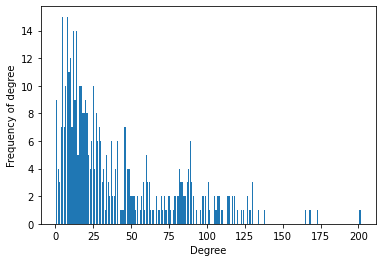

In [ ]:
plt.bar(df_degree_3['c'],df_degree_3['a'])
plt.ylabel('Frequency of degree')
plt.xlabel('Degree')

Here, I have calculated the frequency of each degree and ploted in a bar graph for G0. It seems we have smaller degree with higher frequency whereas nodes with higher degree has lower frequency which satisfies the properties of power law distribution

In [ ]:
df_degree_4 = df_degree_3['c']
df_degree_5 = df_degree_3['a']

-0.5954939411948519 1.4194997116509498


Text(0.5, 0, 'log(Degree)')

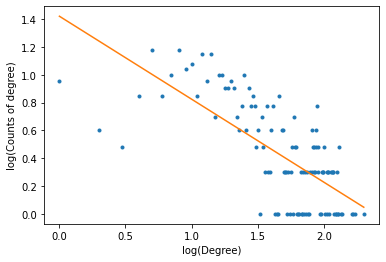

In [ ]:
import math
logk = []
logPk = []
for i in range(len(df_degree_3)):
    logk.append(math.log10(df_degree_4[i]))
    logPk.append(math.log10(df_degree_5[i]))
order = np.argsort(logk)
logk_array = np.array(logk)[order]
logPk_array = np.array(logPk)[order]
plt.plot(logk_array, logPk_array, ".")
m, c = np.polyfit(logk_array, logPk_array, 1)
print(m,c)
plt.plot(logk_array, m*logk_array + c, "-")
plt.ylabel('log(Counts of degree)')
plt.xlabel('log(Degree)')

Another way to look at the power law distribution is to plot the log log graph of degree and counts of degree. In the above graph I have plotted the log log graph and fitted a line and it has the similar form for real world power law following networks. So the largest connected component of our given graph G0 is following the power law distribution. 

***(2) High average local clustering coefficient***

In [ ]:
print(nx.average_clustering(G0)) #average local clustering coefficient for largest connected componnet G0

0.4270389963304332


Now we have a average clustering coeff from our network around 0.42. However we do not know if this value is really higher or not, for that we have to create a random graph with the same number of nodes and edges we have in our largest connected component graph (G0) and calculate the average clustering coeff for the raandom graph. 

I have created two random graph G(n,p) and G(n,m)

In [ ]:
n_G0_2 = G0.number_of_nodes()
m_G0_2 = G0.number_of_edges()
vals = dict(G0.degree).values()
average_degree = sum(vals)/len(vals)
average_degree

39.24825986078886

In [ ]:
nx.info(G0)

'Name: \nType: Graph\nNumber of nodes: 431\nNumber of edges: 8458\nAverage degree:  39.2483'

In [ ]:
G0_np = nx.gnp_random_graph(n_G0_2, average_degree / (n_G0_2 - 1))
print(nx.average_clustering(G0_np))
nx.average_shortest_path_length(G0_np)

0.0881394014725492


1.9370204500080936

In [ ]:
G0_nm = nx.gnm_random_graph(n_G0_2, m_G0_2)
print(nx.average_clustering(G0_nm))
nx.average_shortest_path_length(G0_nm)

0.09145522958487544


1.9329196568283602

I have run both the random graphs multiple times and found that average clustering coeff varies be 0.08 - 0.09 which is much lower than the average clustering coeff from our largest connected compenent graph G0 (0.42). So the given graph follows the real world network property which is higher avearge local clustering coeff. 

***(3) Low average path length***

In [ ]:
nx.average_shortest_path_length(G0)

2.213511034371122

From the real world network models we have seen the avearge path length was around 4-16 (which is already small). Our graph (G0) also has similar smaller average path length like the real world network models, so the given graph G0 also follows the real world property of low average path length 

# **Find the top-10 most central nodes in the G0 network according to:**
a. degree centrality 
b. eigenvector centrality
c. pagerank
d. betweenness centrality
e. closeness centrality 

For calculating all the asked properties I have used the functions that are available in networkx and later sorted them based on the higher values. Finally took the first 10 to find the top 10 central nodes based on this properties and plotted later for better visualization. 

***Degree centrality***

In [ ]:
degree_centrality = nx.degree_centrality(G0)
type(degree_centrality)

dict

In [ ]:
degree_centrality_10 = OrderedDict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
degree_centrality_10

OrderedDict([('18916432', 0.46744186046511627),
             ('15764644', 0.40232558139534885),
             ('1209417007', 0.39069767441860465),
             ('22012091', 0.38372093023255816),
             ('2962868158', 0.3209302325581395),
             ('111635980', 0.3116279069767442),
             ('24195214', 0.3023255813953488),
             ('242426145', 0.3023255813953488),
             ('1077121945', 0.3023255813953488),
             ('40302336', 0.3)])

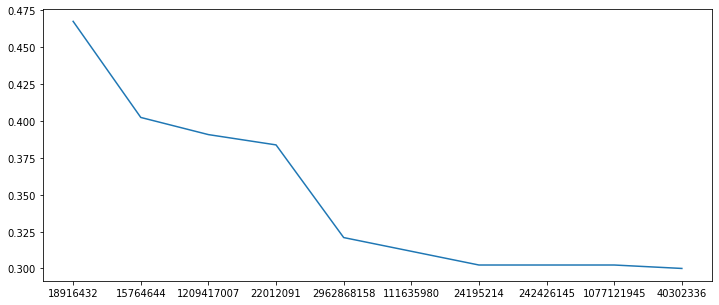

In [ ]:
degree_centrality_10_lists = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10] 
x, y = zip(*degree_centrality_10_lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

***Eigenvector centrality***

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G0)
eigenvector_centrality_10 = OrderedDict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
eigenvector_centrality_10

OrderedDict([('15764644', 0.14551134820327777),
             ('22012091', 0.14122303383019819),
             ('111635980', 0.12981658269558738),
             ('24195214', 0.12774349014647016),
             ('2962868158', 0.1260791782103403),
             ('1077121945', 0.1239907500058236),
             ('140519774', 0.11862462289532907),
             ('384913290', 0.11785654484683258),
             ('40302336', 0.11743619794240873),
             ('2863006655', 0.11691172914409748)])

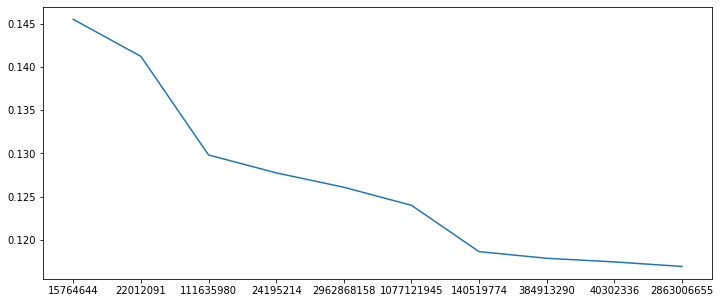

In [ ]:
eigenvector_centrality_10_lists = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10] 
x, y = zip(*eigenvector_centrality_10_lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

***Pagerank***

In [ ]:
pagerank = nx.pagerank(G0)
pagerank_10 = OrderedDict(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10])
pagerank_10

OrderedDict([('18916432', 0.01672579436866864),
             ('1209417007', 0.013426419356463491),
             ('19739126', 0.010418514042555322),
             ('17976923', 0.010370271524344386),
             ('235312723', 0.008041721009617753),
             ('15764644', 0.007888585878718683),
             ('22012091', 0.007406904545614275),
             ('2962868158', 0.006366381067064711),
             ('242426145', 0.006026927477135066),
             ('1077121945', 0.005845923273812865)])

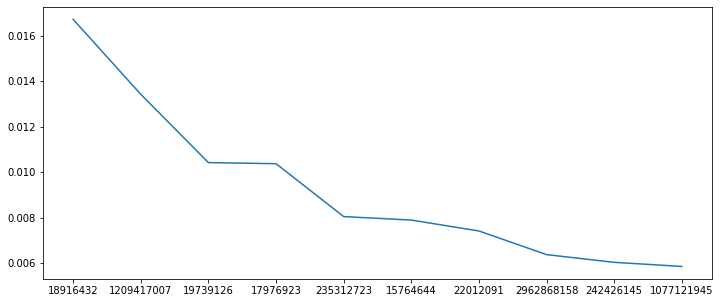

In [ ]:
pagerank_10_lists = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10] 
x, y = zip(*pagerank_10_lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

***Betweenness centrality***

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G0)
betweenness_centrality_10 = OrderedDict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
betweenness_centrality_10

OrderedDict([('18916432', 0.12330703319061122),
             ('1209417007', 0.08884950838674749),
             ('17976923', 0.03721386445381102),
             ('19739126', 0.03409881025237571),
             ('15764644', 0.026242342364152082),
             ('14275291', 0.0246119552847619),
             ('235312723', 0.02039620757921033),
             ('22012091', 0.019586804106442025),
             ('242426145', 0.014847871710247845),
             ('248735463', 0.014460693836363258)])

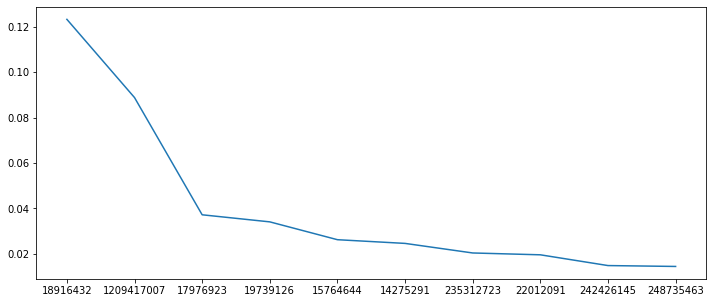

In [ ]:
betweenness_centrality_10_lists = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10] 
x, y = zip(*betweenness_centrality_10_lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

***Closeness centrality***

In [ ]:
closeness_centrality = nx.closeness_centrality(G0)
closeness_centrality_10 = OrderedDict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
closeness_centrality_10

OrderedDict([('18916432', 0.6398809523809523),
             ('1209417007', 0.6151645207439199),
             ('15764644', 0.5963938973647711),
             ('22012091', 0.5882352941176471),
             ('19739126', 0.5733333333333334),
             ('137794015', 0.5672823218997362),
             ('17976923', 0.5613577023498695),
             ('2916086925', 0.5436156763590392),
             ('2962868158', 0.5408805031446541),
             ('242426145', 0.5408805031446541)])

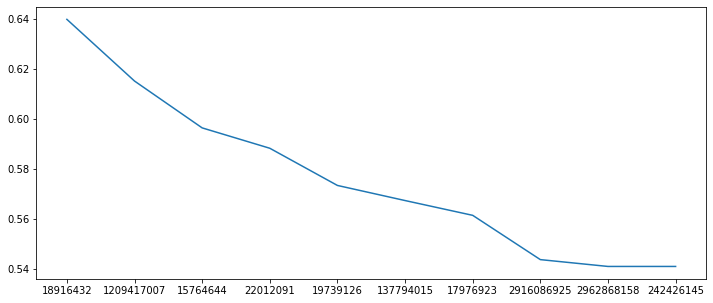

In [ ]:
closeness_centrality_10_lists = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10] 
x, y = zip(*closeness_centrality_10_lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()